In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
diamonds = pd.read_csv('../data/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Convert "cut", "color", and "clarity" into ordered categorical types

In [90]:
ordinal_var_dict = {'cut': ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True,
                                                categories=ordinal_var_dict[var])
    diamonds[var] = diamonds[var].astype(ordered_var)

## Multivariate Exploration

In the previous workspace, you looked at various bivariate relationships. You saw that the log of price was approximately linearly related to the cube root of carat weight, as analogy to its length, width, and depth. You also saw that there was an unintuitive relationship between price and the categorical quality measures of cut, color, and clarity, that the median price decreased with increasing quality. Investigating the distributions more clearly and looking at the relationship between carat weight with the three categorical variables showed that this was due to carat size tending to be smaller for the diamonds with higher categorical grades.

The goal of this workspace will be to depict these interaction effects through the use of multivariate plots.

To start off with, create a plot of the relationship between price, carat, and clarity. In the previous workspace, you saw that clarity had the clearest interactions with price and carat. How clearly does this show up in a multivariate visualization?

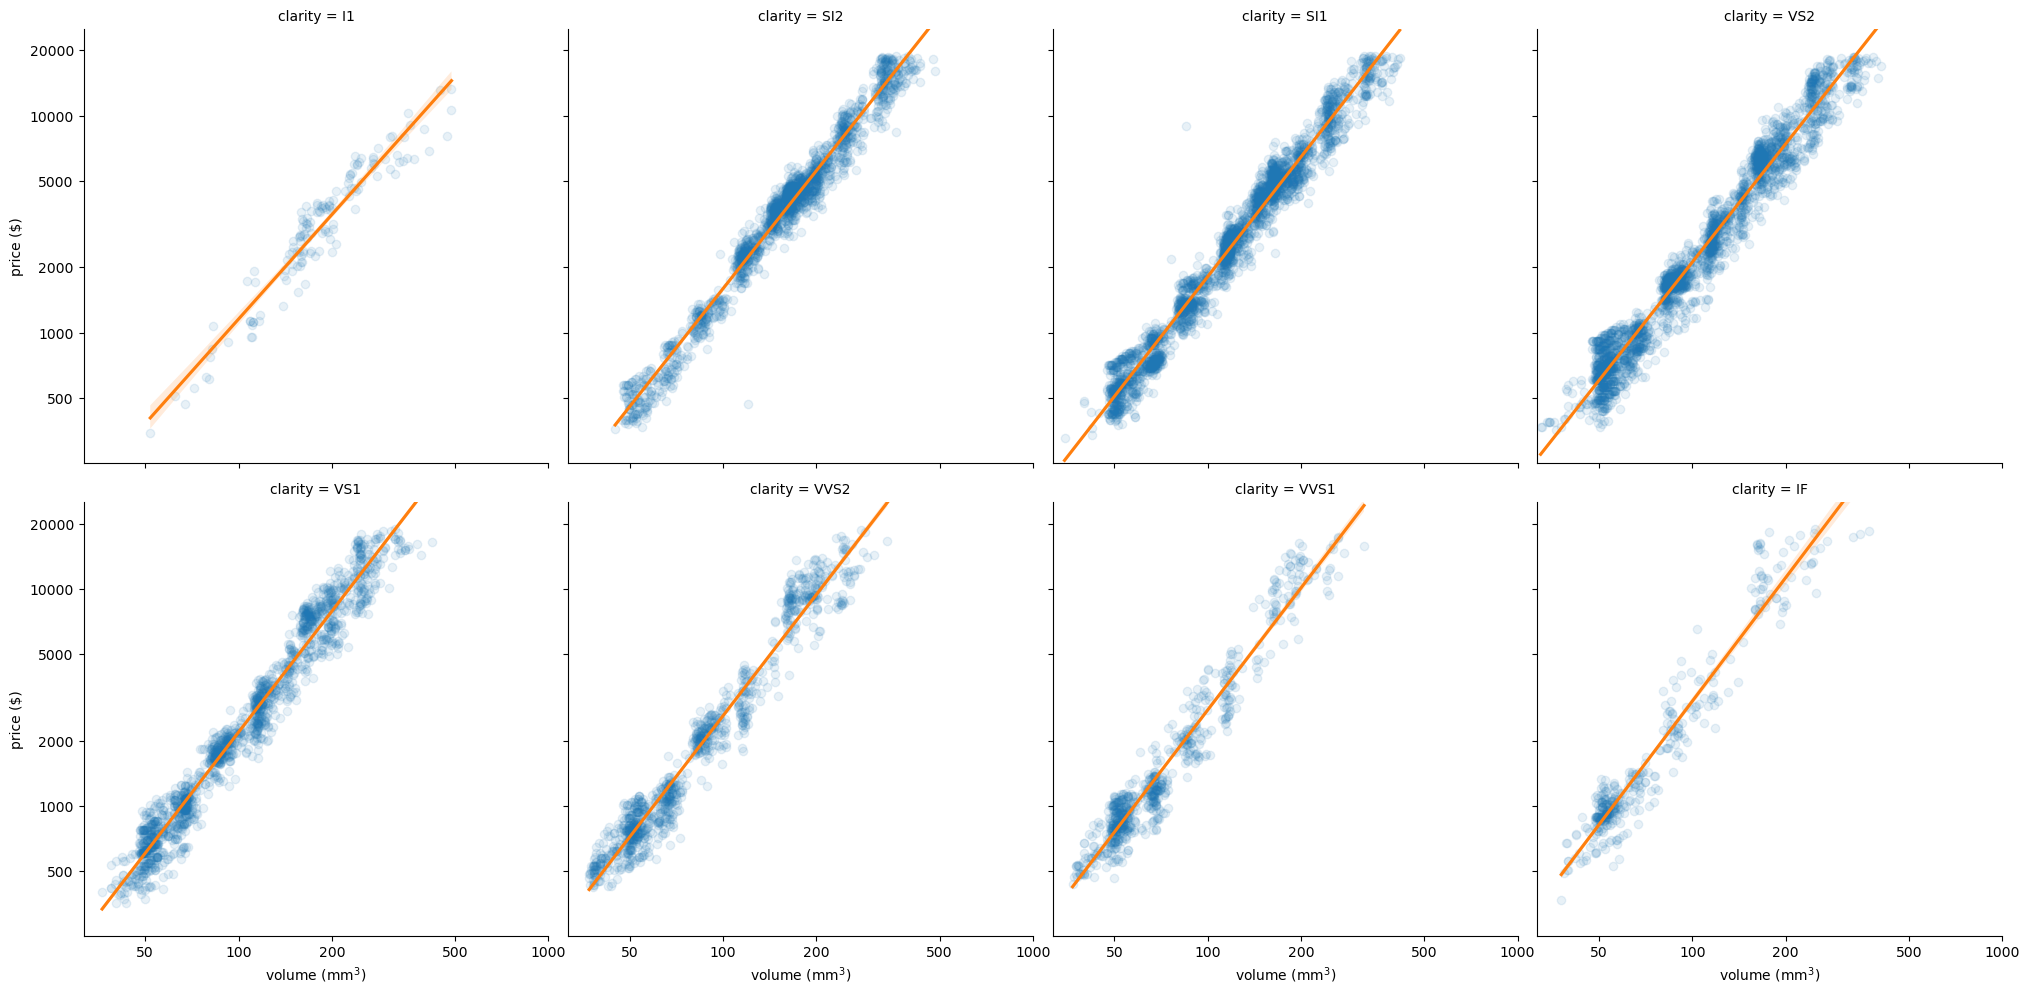

In [91]:
diamonds_sub = diamonds.sample(frac=.2)

diamonds_sub['log_price'] = np.log10(diamonds_sub['price'])
diamonds_sub['volume'] = diamonds_sub['x'] * diamonds_sub['y'] * diamonds_sub['z']
diamonds_sub = diamonds_sub.drop(diamonds_sub[diamonds_sub['volume'] < 1e-6].index)
diamonds_sub['log_volume'] = np.log10(diamonds_sub['volume'])

g = sns.FacetGrid(data=diamonds_sub, height=5, col='clarity', col_wrap=4)
g.map(sns.regplot, 'log_volume', 'log_price', scatter_kws={'alpha':.1}, line_kws={'color':sns.color_palette()[1]})
g.set_axis_labels('volume (mm$^3$)', 'price ($)');

plt.xlim(1.5, 2.9)
plt.ylim(2.4, 4.4)

yticks = [500, 1000, 2000, 5000, 10000, 20000]
plt.yticks(np.log10(yticks), yticks)

xticks = np.array([50, 100, 200, 500, 1000])
plt.xticks(np.log10(xticks), xticks);

The above plots show how volume (which is proportional to weight) is a clear driver of the price for a diamond. However, for a given volume, it is not readily apparent how the categorical variables impact the price.

Therefore, let's try a different plot, diamond price against cut and color quality features for a relatively fixed size.

Again, we will do this to avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices. Therefore, we will focus our visualization on only a small range of diamond weights. For this plot, we will select diamonds in a small range around 1 carat weight.

First, we will start by viewing the mean price for diamonds of similar size while varying their categorical variables.

In [92]:
left_limit = 0.95
right_limit = 1.05
diamonds_1c = diamonds_sub[(diamonds_sub['carat'] > left_limit) & (diamonds_sub['carat'] < right_limit)]

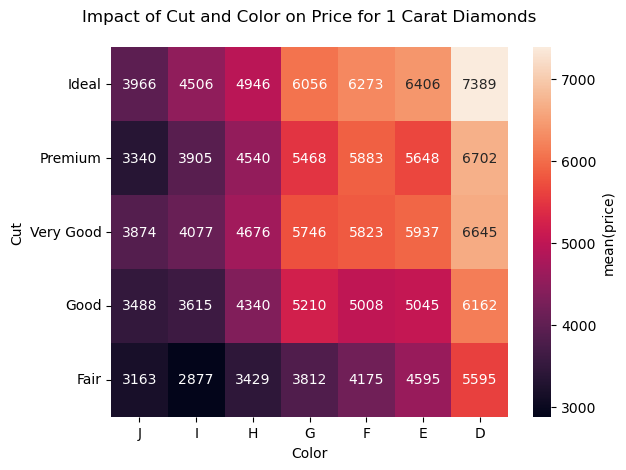

In [93]:
ax = sns.heatmap(diamonds_1c.groupby(['cut', 'color'])['price'].mean(numeric_only=True).unstack(),
                 annot=True, fmt='.0f', cbar_kws={'label': 'mean(price)'})
ax.invert_yaxis()
plt.yticks(rotation=0)
plt.xlabel('Color')
plt.ylabel('Cut')
plt.title('Impact of Cut and Color on Price for 1 Carat Diamonds\n');

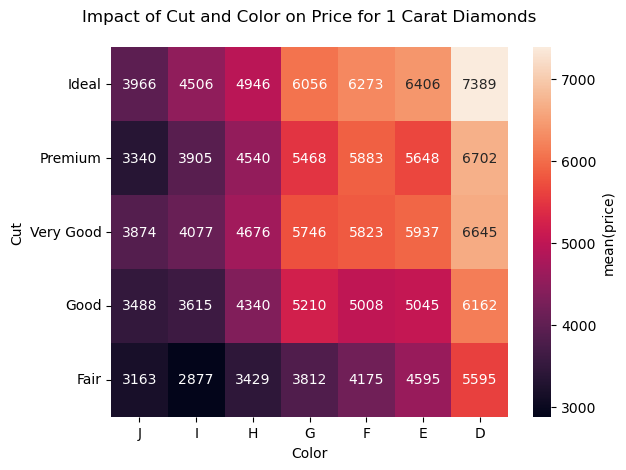

In [94]:
ax = sns.heatmap(diamonds_1c.groupby(['cut', 'color'])['price'].mean(numeric_only=True).unstack(), annot=True, fmt='.0f', cbar_kws={'label': 'mean(price)'})
ax.invert_yaxis()
plt.yticks(rotation=0)
plt.xlabel('Color')
plt.ylabel('Cut')
plt.title('Impact of Cut and Color on Price for 1 Carat Diamonds\n');

From the above plot, we should see a general trend in increasing price from bottom to top and left to right, which reflects increasing diamond quality. If we change the axes to reflect, clarity and color, the distinction is more pronounced.

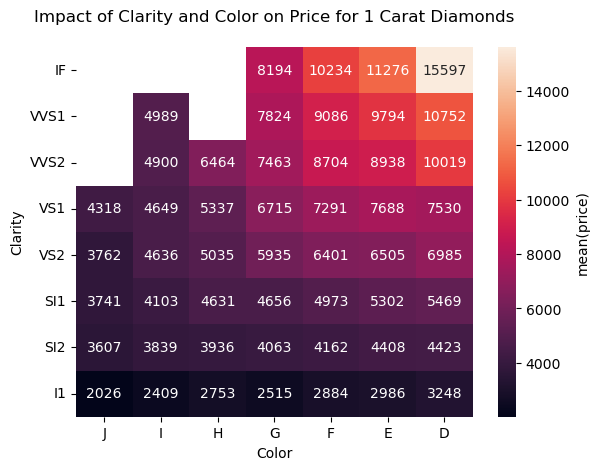

In [95]:
ax = sns.heatmap(diamonds_1c.groupby(['clarity', 'color'])['price'].mean(numeric_only=True).unstack(), annot=True, fmt='.0f', cbar_kws={'label': 'mean(price)'})
ax.invert_yaxis()
plt.yticks(rotation=0)
plt.xlabel('Color')
plt.ylabel('Clarity')
plt.title('Impact of Clarity and Color on Price for 1 Carat Diamonds\n');

We should also check our other summary statistics to confirm that our distributions also follow the same trend as the mean.

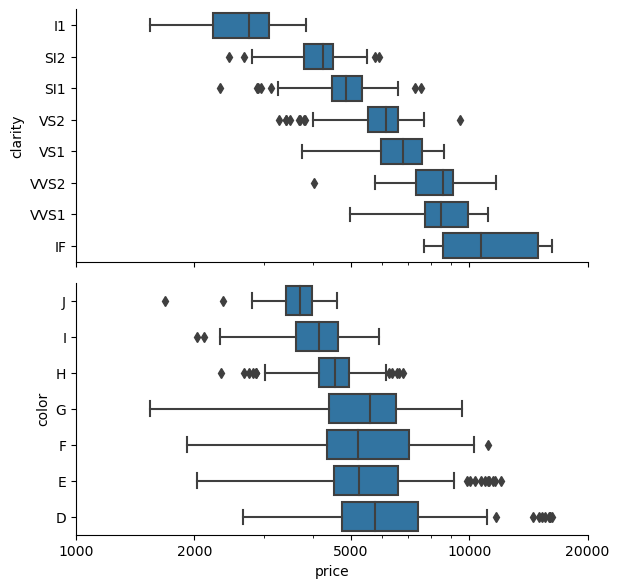

In [96]:
g = sns.PairGrid(data=diamonds_1c, x_vars=['price'], y_vars=['clarity', 'color'], height=3, aspect=2)
g.map(sns.boxplot, color=sns.color_palette()[0])
plt.xscale('log')

xticks = [1000, 2000, 5000, 10000, 20000]
plt.xticks(xticks, xticks);

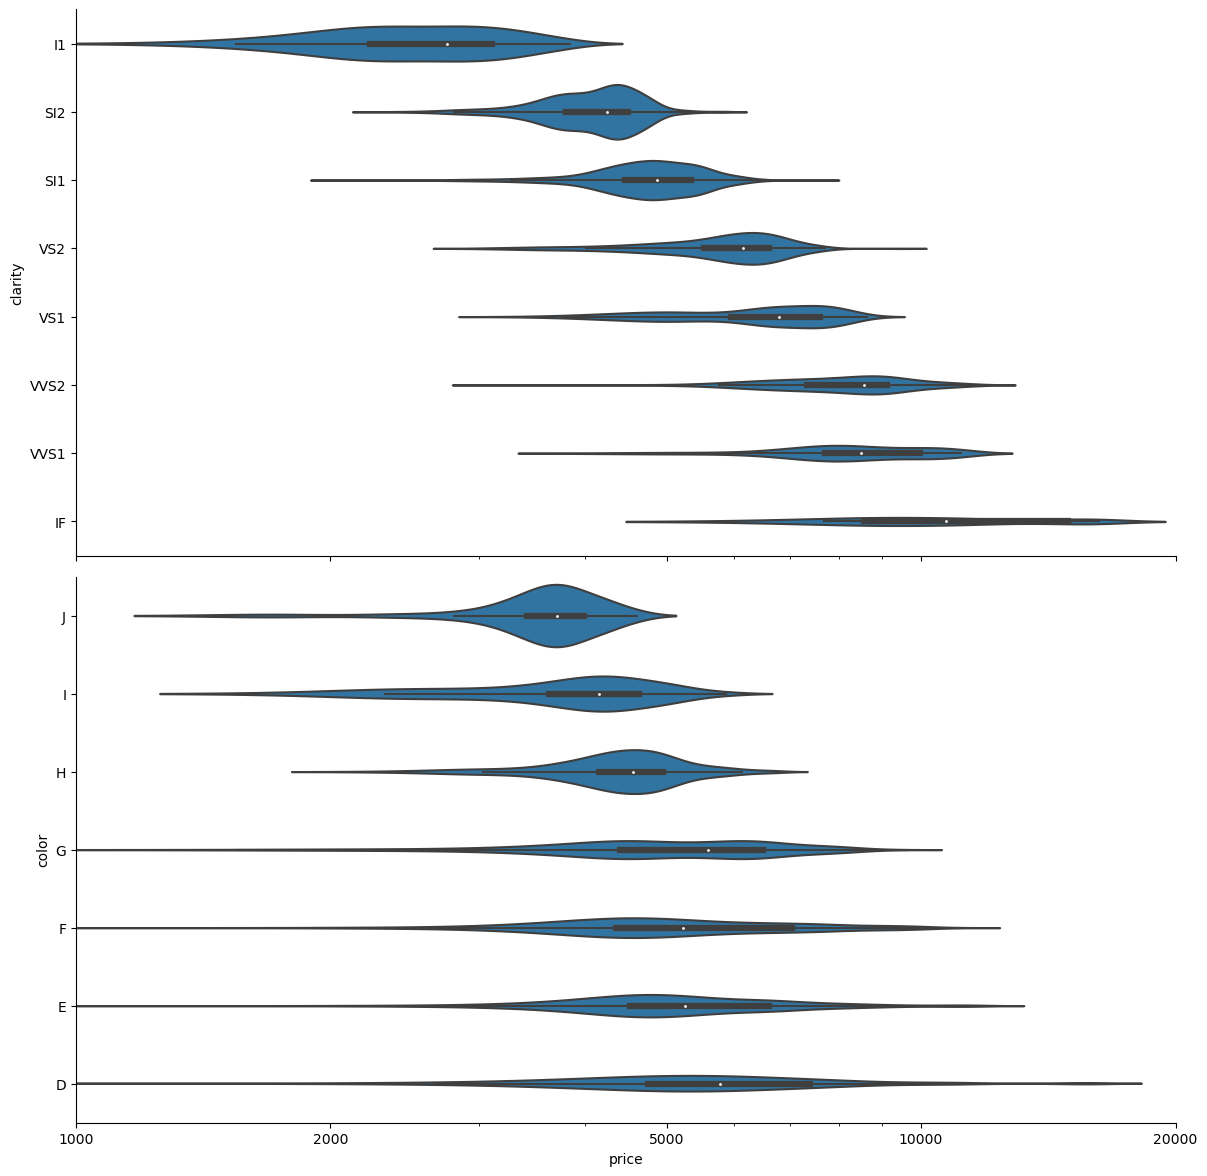

In [97]:
g = sns.PairGrid(data=diamonds_1c, x_vars=['price'], y_vars=['clarity', 'color'], height=6, aspect=2)
g.map(sns.violinplot, color=sns.color_palette()[0])
plt.xscale('log')

xticks = [1000, 2000, 5000, 10000, 20000]
plt.xticks(xticks, xticks)
plt.xlim(1000, 20000);

From this, we can see that our prices tend to increase as our color and clarity improve.

If we add cut to our plot, we notice that price is relatively uniform across the various quality of cuts. However, as we saw in our heatmap, if we control for weight (carat), clarity, and color, cut does have an impact on the price of a diamond, suggesting it lags behind those in importance.